<a href="https://colab.research.google.com/github/ajmuruga/py/blob/master/HCV_NSGB_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
url = 'https://github.com/dataprofessor/data/blob/master/HCV_NS5B_Curated.csv?raw=true'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578 entries, 0 to 577
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CMPD_CHEMBLID          578 non-null    object 
 1   CANONICAL_SMILES       578 non-null    object 
 2   STANDARD_TYPE          578 non-null    object 
 3   RELATION               578 non-null    object 
 4   STANDARD_VALUE         578 non-null    float64
 5   STANDARD_UNITS         578 non-null    object 
 6   pIC50                  578 non-null    float64
 7   PROTEIN_ACCESSION      578 non-null    object 
 8   PREF_NAME              578 non-null    object 
 9   DOC_CHEMBLID           578 non-null    object 
 10  ASSAY_SRC_DESCRIPTION  578 non-null    object 
 11  DESCRIPTION            578 non-null    object 
 12  PUBMED_ID              570 non-null    float64
 13  JOURNAL                571 non-null    object 
 14  YEAR                   578 non-null    int64  
 15  VOLUME

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd

df.head()

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,pIC50,PROTEIN_ACCESSION,PREF_NAME,DOC_CHEMBLID,...,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,Activity
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,IC50,=,1.40,nM,8.85,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,354.37,4.93,75.35,0,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,IC50,=,1.70,nM,8.77,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1146957,...,Bioorg. Med. Chem. Lett.,2006,16.00,8.00,2205.00,419.54,2.37,107.45,0,Active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,IC50,=,3.00,nM,8.52,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,336.38,4.72,75.35,0,Active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,IC50,=,4.80,nM,8.32,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,335.40,5.51,73.32,1,Active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,IC50,=,6.00,nM,8.22,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,510.62,6.79,71.77,2,Active


In [42]:
len(df.CANONICAL_SMILES.unique())

578

In [43]:
df.STANDARD_TYPE.unique()

array(['IC50'], dtype=object)

In [44]:
selection = ['CMPD_CHEMBLID','CANONICAL_SMILES','STANDARD_VALUE']
df2 = df[selection]
df2

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00
...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.00
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.00
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.00
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.00


In [45]:
bioactivity_threshold = []
for i in df2.STANDARD_VALUE:
  if float(i) >= 20000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [46]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df3 = pd.concat([df2, bioactivity_class], axis=1)
df3

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE,class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active
...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.00,inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.00,inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.00,inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.00,inactive


In [47]:
df3.rename(columns = {'CANONICAL_SMILES' : 'SMILES'}, inplace = True)
df3.rename(columns = {'CMPD_CHEMBLID' : 'CHEMBLID'}, inplace = True)
df3

,CHEMBLID,SMILES,STANDARD_VALUE,class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active
...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.00,inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.00,inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.00,inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.00,inactive


In [48]:
df3.to_csv('HCV_NS5Bcurated.csv', index=False)

In [13]:
! zip HCV_NS5Bcurated.zip *.csv

  adding: HCV_NS5Bcurated.csv (deflated 82%)


In [14]:
! mkdir "/content/drive/My Drive/Colab Notebooks/Bala Python Code"

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/Bala Python Code’: File exists


In [15]:
! cp HCV_NS5Bcurated.csv "/content/drive/My Drive/Colab Notebooks/Bala Python Code"

In [16]:
! ls -l "/content/drive/My Drive/Colab Notebooks/Bala Python Code"

total 47
-rw------- 1 root root 47918 Aug  9 02:30 HCV_NS5Bcurated.csv


In [17]:
! head HCV_NS5Bcurated.csv

CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_VALUE,class
CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.4,active
CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccccc3N2)O)C(C)(C)C,1.7,active
CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.0,active
CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.8,active
CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4)c5ccc(cc15)C(=O)O,6.0,active
CHEMBL3651437,CNC(=O)c1c(oc2ccc(c(F)c12)c3cc(cc(F)c3C)C(=O)NC4(COC4)c5ncccn5)c6ccc(F)cc6,6.0,active
CHEMBL191196,CS(=O)(=O)N1CCN(CC1)C(=O)Cn2c(c3ccc(Cl)cc3)c(C4CCCCC4)c5ccc(cc25)C(=O)O,7.0,active
CHEMBL173466,OC(=O)[C@H](Cc1c[nH]c2ccc(NC(=O)C(=O)O)cc12)NC(=O)c3ccc4c(c3)nc(c5cocc5)n4C6CCCCC6,8.0,active
CHEMBL363199,OC(=O)c1ccc2c(C3CCCCC3)c(c4ccc(Cl)cc4)n(CC(=O)NCC5CC5)c2c1,8.0,active


In [18]:
STANDARD_VALUE = []
for i in df3.STANDARD_VALUE:
  STANDARD_VALUE.append(i)

In [49]:
df3

,CHEMBLID,SMILES,STANDARD_VALUE,class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active
...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.00,inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.00,inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.00,inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.00,inactive


In [50]:
f2_passed_batches2 = df3["STANDARD_VALUE"].between(1, 10000, inclusive = True)
df3[f2_passed_batches2]

,CHEMBLID,SMILES,STANDARD_VALUE,class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active
...,...,...,...,...
407,CHEMBL384679,OC(=O)c1ccc2c(c1)nc(c3ccc(OCc4ccccc4c5ccccc5)c...,930.00,active
408,CHEMBL427171,OC(=O)\C(=C\c1ccc(Oc2ccccc2Br)cc1)\NC(=O)Cc3cc...,940.00,active
409,CHEMBL372359,OC(=O)C(=O)\C=C(/O)\c1cccc(OCc2ccsc2C(=O)O)c1,950.00,active
410,CHEMBL439333,CC(C)CCN1C(=O)C(=C(O)c2cc(NC(=O)C3CCCC3)ccc12)...,973.00,active


In [51]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-08-09 03:15:41--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M  32.1MB/s    in 2.5s    

2022-08-09 03:15:44 (32.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - 

In [52]:
df_no_smiles = df3.drop(columns='SMILES')

In [54]:
smiles = []
for i in df3.SMILES.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'SMILES')

In [55]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,CHEMBLID,STANDARD_VALUE,class,SMILES
0,CHEMBL179256,1.40,active,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4
1,CHEMBL204350,1.70,active,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...
2,CHEMBL179257,3.00,active,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4
3,CHEMBL178784,4.80,active,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4
4,CHEMBL369319,6.00,active,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...
...,...,...,...,...
573,CHEMBL175762,139000.00,inactive,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3
574,CHEMBL197882,167000.00,inactive,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2
575,CHEMBL177122,186000.00,inactive,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3
576,CHEMBL175454,360000.00,inactive,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4


In [56]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [57]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [58]:
df_lipinski = lipinski(df_clean_smiles.SMILES)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,354.38,4.75,2.00,4.00
1,419.55,3.70,2.00,5.00
2,336.39,4.61,2.00,4.00
3,335.40,5.29,3.00,2.00
4,510.63,6.72,1.00,4.00
...,...,...,...,...
573,309.37,4.16,1.00,4.00
574,288.32,3.28,2.00,4.00
575,244.29,3.24,1.00,3.00
576,315.33,3.79,1.00,4.00


In [59]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,354.38,4.75,2.00,4.00
1,419.55,3.70,2.00,5.00
2,336.39,4.61,2.00,4.00
3,335.40,5.29,3.00,2.00
4,510.63,6.72,1.00,4.00
...,...,...,...,...
573,309.37,4.16,1.00,4.00
574,288.32,3.28,2.00,4.00
575,244.29,3.24,1.00,3.00
576,315.33,3.79,1.00,4.00


In [60]:
df3

,CHEMBLID,SMILES,STANDARD_VALUE,class
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active
...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.00,inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.00,inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.00,inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.00,inactive


In [61]:
df_combined = pd.concat([df3,df_lipinski], axis=1)

In [62]:
df_combined

,CHEMBLID,SMILES,STANDARD_VALUE,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active,354.38,4.75,2.00,4.00
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active,419.55,3.70,2.00,5.00
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active,336.39,4.61,2.00,4.00
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active,335.40,5.29,3.00,2.00
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active,510.63,6.72,1.00,4.00
...,...,...,...,...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.00,inactive,309.37,4.16,1.00,4.00
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.00,inactive,288.32,3.28,2.00,4.00
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.00,inactive,244.29,3.24,1.00,3.00
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.00,inactive,315.33,3.79,1.00,4.00


In [63]:
df_combined.STANDARD_VALUE.describe()

count      578.00
mean     11378.77
std      31007.38
min          1.40
25%         51.50
50%        230.00
75%      13000.00
max     408000.00
Name: STANDARD_VALUE, dtype: float64

In [64]:
def pIC50(input):
    pIC50 = []

    for i in input['STANDARD_VALUE']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('STANDARD_VALUE', 1)
    return x

In [65]:
df4 = df['pIC50']
df4

0     8.85
1     8.77
2     8.52
3     8.32
4     8.22
      ... 
573   3.86
574   3.78
575   3.73
576   3.44
577   3.39
Name: pIC50, Length: 578, dtype: float64

In [66]:
df_final = pd.concat([df_combined,df4], axis=1)
df_final.head(200)

,CHEMBLID,SMILES,STANDARD_VALUE,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active,354.38,4.75,2.00,4.00,8.85
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active,419.55,3.70,2.00,5.00,8.77
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active,336.39,4.61,2.00,4.00,8.52
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active,335.40,5.29,3.00,2.00,8.32
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active,510.63,6.72,1.00,4.00,8.22
...,...,...,...,...,...,...,...,...,...
195,CHEMBL209396,Cc1nc(c(COc2ccc(cc2)c3nc4cc(ccc4n3C5CCCCC5)C(=...,90.00,active,558.10,8.57,1.00,6.00,7.05
196,CHEMBL192804,OC(=O)\C(=C\c1ccc(Oc2ccccc2Br)cc1)\NC(=O)c3ccc...,90.00,active,456.27,5.24,2.00,3.00,7.05
197,CHEMBL201814,OC1=C(C(=O)N(CCC=C)c2ccccc12)C3=NS(=O)(=O)c4cc...,90.00,active,395.44,2.84,2.00,6.00,7.05
198,CHEMBL206793,Cc1cccc(Cl)c1CNC(=O)Nc2ccsc2c3nc(O)c(O)c(n3)C(...,90.00,active,434.86,3.60,5.00,7.00,7.05


In [67]:
df_final.to_csv('HCV_NS5B_pIC50.csv')

In [68]:
df_final['class'] != 'intermediate'

0      True
1      True
2      True
3      True
4      True
       ... 
573    True
574    True
575    True
576    True
577    True
Name: class, Length: 578, dtype: bool

In [69]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

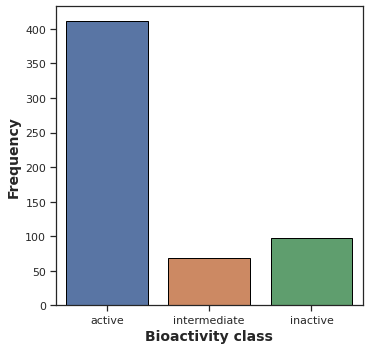

In [70]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [71]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,CHEMBLID,SMILES,STANDARD_VALUE,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,1.40,active,354.38,4.75,2.00,4.00,8.85
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,1.70,active,419.55,3.70,2.00,5.00,8.77
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,3.00,active,336.39,4.61,2.00,4.00,8.52
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,4.80,active,335.40,5.29,3.00,2.00,8.32
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,6.00,active,510.63,6.72,1.00,4.00,8.22
...,...,...,...,...,...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,139000.00,inactive,309.37,4.16,1.00,4.00,3.86
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,167000.00,inactive,288.32,3.28,2.00,4.00,3.78
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,186000.00,inactive,244.29,3.24,1.00,3.00,3.73
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,360000.00,inactive,315.33,3.79,1.00,4.00,3.44


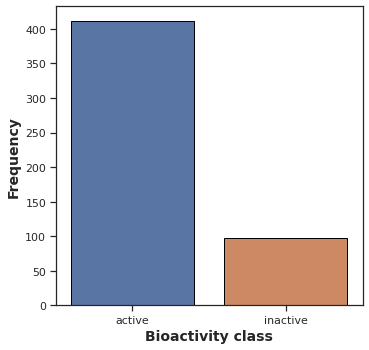

In [72]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

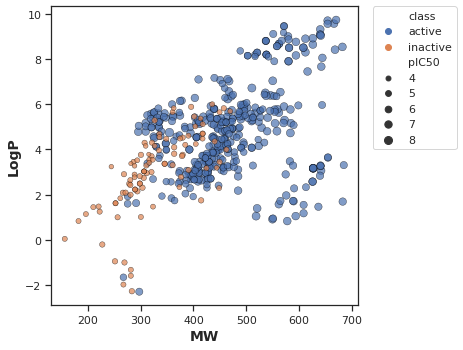

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## **https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/**

In [74]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [75]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.00,0.00,0.05,Different distribution (reject H0)


In [50]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,36075.5,8.683304e-34,0.05,Different distribution (reject H0)


In [51]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,29749.0,3.071750e-13,0.05,Different distribution (reject H0)


In [52]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,23113.0,0.017521,0.05,Different distribution (reject H0)


In [53]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,22815.0,0.041797,0.05,Different distribution (reject H0)


In [76]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-08-09 03:18:19--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-08-09 03:18:20--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   162MB/s    in 0.2s    

2022-08-09 03:18:20 (162 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-08-09 03:18:20--  https://github

In [77]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [78]:
selection = ['SMILES','CHEMBLID']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [79]:
! cat molecule.smi | head -5

OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4	CHEMBL179256
CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccccc3N2)O)C(C)(C)C	CHEMBL204350
OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4	CHEMBL179257
OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4	CHEMBL178784
CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4)c5ccc(cc15)C(=O)O	CHEMBL369319


In [80]:
! cat molecule.smi | wc -l

578


In [81]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [82]:
! bash padel.sh

Processing CHEMBL179256 in molecule.smi (1/578). 
Processing CHEMBL204350 in molecule.smi (2/578). 
Processing CHEMBL179257 in molecule.smi (3/578). Average speed: 4.34 s/mol.
Processing CHEMBL178784 in molecule.smi (4/578). Average speed: 2.35 s/mol.
Processing CHEMBL369319 in molecule.smi (5/578). Average speed: 1.89 s/mol.
Processing CHEMBL3651437 in molecule.smi (6/578). Average speed: 1.79 s/mol.
Processing CHEMBL191196 in molecule.smi (7/578). Average speed: 1.74 s/mol.
Processing CHEMBL173466 in molecule.smi (8/578). Average speed: 1.56 s/mol.
Processing CHEMBL210693 in molecule.smi (10/578). Average speed: 1.35 s/mol.
Processing CHEMBL363199 in molecule.smi (9/578). Average speed: 1.45 s/mol.
Processing CHEMBL190428 in molecule.smi (11/578). Average speed: 1.42 s/mol.
Processing CHEMBL362957 in molecule.smi (12/578). Average speed: 1.14 s/mol.
Processing CHEMBL190098 in molecule.smi (13/578). Average speed: 1.13 s/mol.
Processing CHEMBL365951 in molecule.smi (14/578). Average s

In [83]:
df3_X = pd.read_csv('descriptors_output.csv')

In [84]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL204350,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL179256,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL179257,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL178784,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL369319,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,CHEMBL178067,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
574,CHEMBL197882,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575,CHEMBL177122,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,CHEMBL175454,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df3_Y = df_2class['pIC50']
df3_Y

0     8.85
1     8.77
2     8.52
3     8.32
4     8.22
      ... 
573   3.86
574   3.78
575   3.73
576   3.44
577   3.39
Name: pIC50, Length: 510, dtype: float64

In [87]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.85
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.77
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.52
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.32
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.86
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.78
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.73
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.44


In [88]:
dataset3.to_csv('HCV_01bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [89]:
df = pd.read_csv('HCV_01bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [90]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.85
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.77
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.52
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.32
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.22


In [91]:
df.isnull().sum()

PubchemFP0       0
PubchemFP1       0
PubchemFP2       0
PubchemFP3       0
PubchemFP4       0
                ..
PubchemFP877     0
PubchemFP878     0
PubchemFP879     0
PubchemFP880     0
pIC50           68
Length: 882, dtype: int64

In [92]:
df['pIC50'].head()

0   8.85
1   8.77
2   8.52
3   8.32
4   8.22
Name: pIC50, dtype: float64

In [93]:
df['pIC50'].isnull().sum()

68

In [94]:
df.dropna(inplace=True)
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.85
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.77
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.52
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.32
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.86
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.78
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.73
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.44


In [95]:
df.isnull().sum()

PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
PubchemFP4      0
               ..
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
pIC50           0
Length: 882, dtype: int64

In [35]:
df

,CMPD_CHEMBLID,CANONICAL_SMILES,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,pIC50,PROTEIN_ACCESSION,PREF_NAME,DOC_CHEMBLID,...,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,Activity
0,CHEMBL179256,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3F)n2C4CCCCC4,IC50,=,1.40,nM,8.85,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,354.37,4.93,75.35,0,Active
1,CHEMBL204350,CC(C)(C)CCN1[C@H](C(=C(C1=O)C2=NS(=O)(=O)c3ccc...,IC50,=,1.70,nM,8.77,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1146957,...,Bioorg. Med. Chem. Lett.,2006,16.00,8.00,2205.00,419.54,2.37,107.45,0,Active
2,CHEMBL179257,OC(=O)c1ccc2c(c1)nc(c3ccc(O)cc3)n2C4CCCCC4,IC50,=,3.00,nM,8.52,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,336.38,4.72,75.35,0,Active
3,CHEMBL178784,OC(=O)c1ccc2c(C3CCCCC3)c([nH]c2c1)c4ccc(O)cc4,IC50,=,4.80,nM,8.32,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,335.40,5.51,73.32,1,Active
4,CHEMBL369319,CN(C)C(=O)Cn1c(c2ccc(OCc3ccccc3)cc2)c(C4CCCCC4...,IC50,=,6.00,nM,8.22,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1142688,...,J. Med. Chem.,2005,48.00,5.00,1314.00,510.62,6.79,71.77,2,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,CHEMBL175762,CCC(CC)n1c(nc2cc(ccc12)C(=O)O)c3ccccn3,IC50,=,139000.00,nM,3.86,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,...,Bioorg. Med. Chem. Lett.,2004,14.00,1.00,119.00,309.36,4.16,68.01,0,Inactive
574,CHEMBL197882,Cc1sc(cc1\C(=C\C(=O)C(=O)O)\O)c2ccccc2,IC50,=,167000.00,nM,3.78,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1140440,...,J. Med. Chem.,2005,48.00,20.00,6304.00,288.32,2.88,102.83,0,Inactive
575,CHEMBL177122,OC(=O)c1ccc2c(c1)ncn2C3CCCCC3,IC50,=,186000.00,nM,3.73,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,...,Bioorg. Med. Chem. Lett.,2004,14.00,1.00,119.00,244.29,3.04,55.12,0,Inactive
576,CHEMBL175454,OC(=O)c1ccc2c(c1)nc(c3ccccn3)n2c4ccccc4,IC50,=,360000.00,nM,3.44,Q8JXU8,Hepatitis C virus NS5B RNA-dependent RNA polym...,CHEMBL1149223,...,Bioorg. Med. Chem. Lett.,2004,14.00,1.00,119.00,315.33,3.96,68.01,0,Inactive


In [96]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
574,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
575,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
576,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
X.isnull().sum()

PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
PubchemFP4      0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 881, dtype: int64

In [98]:
Y = df['pIC50']
Y

0     8.85
1     8.77
2     8.52
3     8.32
4     8.22
      ... 
573   3.86
574   3.78
575   3.73
576   3.44
577   3.39
Name: pIC50, Length: 510, dtype: float64

In [99]:
X.shape

(510, 881)

In [100]:
Y.shape

(510,)

In [101]:
X.shape

(510, 881)

In [102]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [116]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [117]:
X_train.shape, Y_train.shape

((408, 180), (408,))

In [118]:
X_test.shape, Y_test.shape

((102, 180), (102,))

In [119]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.6673414996928286

In [108]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show>

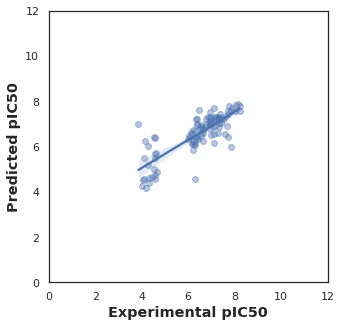

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [110]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [111]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [112]:
 ! pip install lazypredict
 from lazypredict.Supervised import LazyRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 44428.95it/s]


In [121]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.95,0.97,0.19,0.82
DecisionTreeRegressor,0.95,0.97,0.19,0.06
ExtraTreeRegressor,0.95,0.97,0.19,0.06
GaussianProcessRegressor,0.95,0.97,0.19,0.13
XGBRegressor,0.95,0.97,0.19,0.43
RandomForestRegressor,0.87,0.93,0.31,0.78
BaggingRegressor,0.83,0.91,0.36,0.17
MLPRegressor,0.78,0.88,0.40,1.13
HistGradientBoostingRegressor,0.78,0.88,0.41,1.44


In [123]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

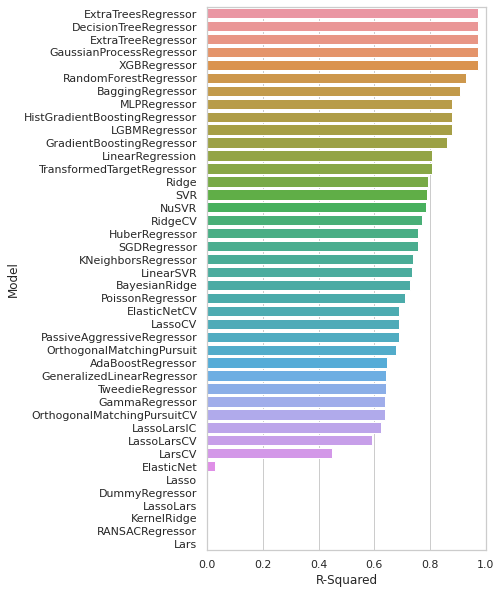

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

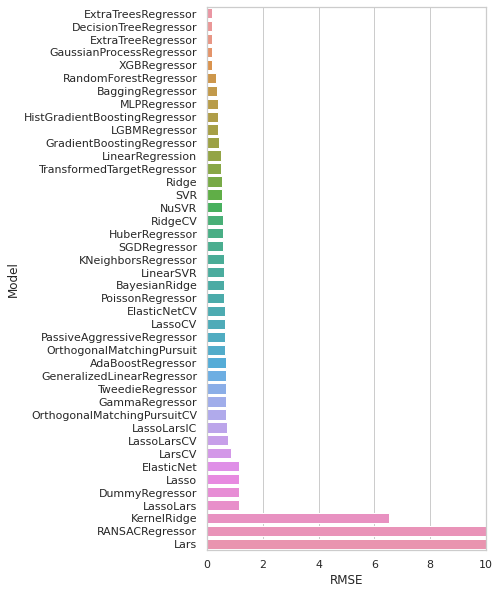

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

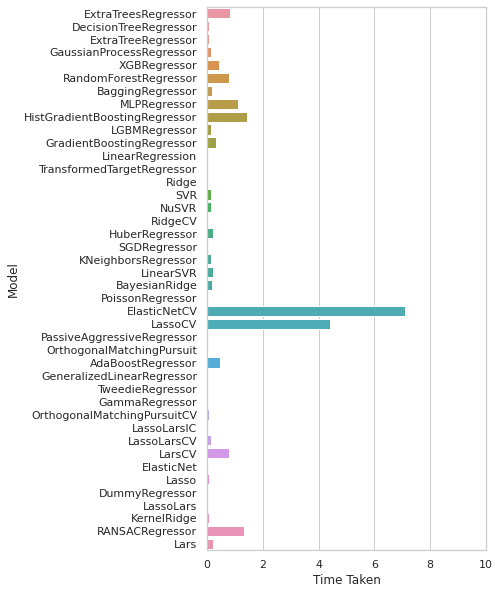

In [127]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))